In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df= pd.read_csv("clustering_synthetic_dataset.csv")
df

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


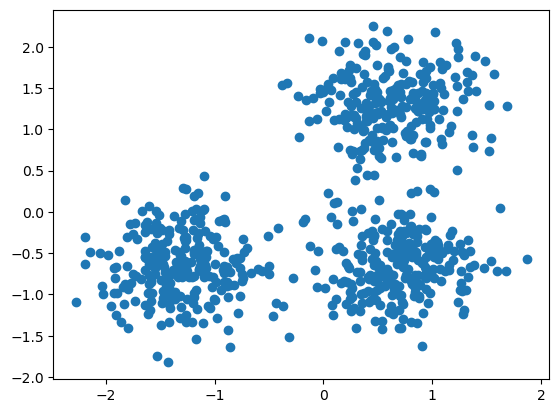

In [2]:
#1 Get number of species, we used 3 species 
X= df["f1"].values
y= df["f2"]

plt.scatter(X, y)

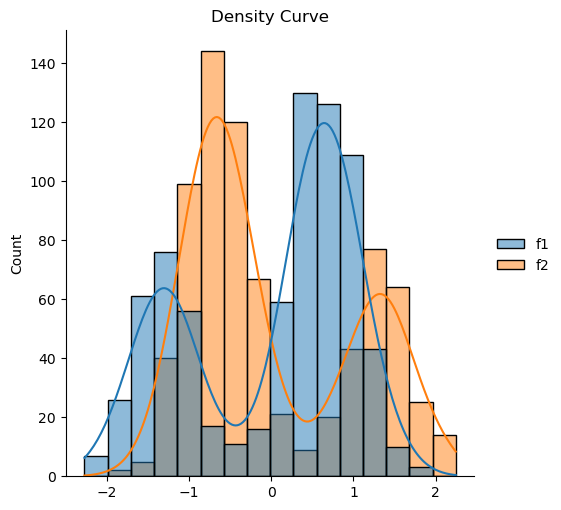

<Figure size 640x480 with 0 Axes>

In [3]:
#2 Identify Ranges

#Species 1 has feature 1 in the range of [-2-0.5]
#Species 1 has feature 2 in the range of [-1.5-0]

#Species 2 has feature 1 in the range of [0-1.5]
#Species 2 has feature 2 in the range of [-1.5-0]

#Species 3 has feature 1 in the range of [0-1.5]
#Species 3 has feature 2 in the range of [0.5-2]




sns.displot(df, kde=True)
plt.title("Density Curve")
plt.show()
plt.clf()

#fit curve and skirts of density curve are outliers
#Also mean plust two sd

Text(0.5, 1.0, 'K-Means Clustering')

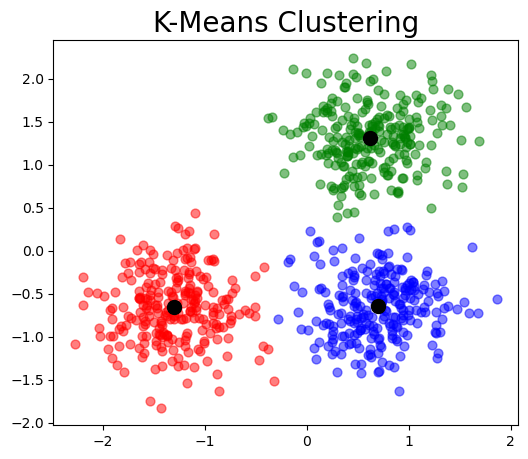

In [4]:
#3 We will remove anomalies

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings('ignore')

cluster= KMeans(n_clusters= 3)
model= cluster.fit(df)


centroids= model.cluster_centers_
centroids


colors=["red","blue","green"]

plt.figure(figsize=(6,5))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].f1, df[model.labels_==i].f2, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering",size=20)


In [5]:
#Get Distances

f1_dist= []

for i in df['f1'].unique():
    df2 = df[df['f1'] == i]
    f1 = df2.drop(columns=['f2']).values
    centroids= model.cluster_centers_    
    euclid = [np.linalg.norm(f1 - centroids) for j in f1]
    f1_dist.append(euclid)
    
    
f1_dist

[[2.566186485522152],
 [4.180428505903214],
 [2.411845412703387],
 [2.2864668683434117],
 [3.55519036449704],
 [3.84427535942954],
 [3.923742469269746],
 [2.678078049026322],
 [3.4804201868278724],
 [3.3553413278515434],
 [3.7543307241049493],
 [3.8218661397999534],
 [3.442561371113783],
 [3.6124602870711224],
 [2.9800345415516185],
 [2.320344243239849],
 [4.184804781044081],
 [3.2008127773088035],
 [2.5919606217883553],
 [2.503190965302316],
 [2.536833049021818],
 [2.599023657839626],
 [3.2331625953465855],
 [3.235398374943106],
 [4.09325405393291],
 [3.6344458891152125],
 [2.565399900366974],
 [3.1294736558298175],
 [2.3470361164514744],
 [3.380382273679428],
 [2.54814276649513],
 [3.7094255652514896],
 [5.097092276134115],
 [2.605959439740739],
 [3.203791540110754],
 [2.921521675972152],
 [3.0795594935430017],
 [2.5645453371392604],
 [2.448546176407077],
 [2.308276434027224],
 [3.0919483977219016],
 [3.887290338605889],
 [4.246581254509338],
 [4.2877944894453055],
 [5.83687652620999

In [6]:
#Get Distances

f2_dist= []

for i in df['f2'].unique():
    df2 = df[df['f2'] == i]
    f2 = df2.drop(columns=['f1']).values
    centroids= model.cluster_centers_    
    euclid = [np.linalg.norm(f2 - centroids) for j in f2]
    f2_dist.append(euclid)
    
    
f2_dist

[[4.206355142010609],
 [3.0670294498760247],
 [3.3999551004881776],
 [3.4469313162694846],
 [4.893060672030799],
 [2.361554876985645],
 [2.9465856068241374],
 [2.4210529986032023],
 [3.1327510973472625],
 [3.982292408241267],
 [2.7120558436036903],
 [3.4536491034771823],
 [2.9749365973277273],
 [2.777494665414188],
 [3.7721406104419533],
 [4.541225959732689],
 [5.02211849719183],
 [2.562728206918318],
 [2.3861107523432503],
 [3.4691019186512615],
 [3.3021977881289386],
 [2.7678632993005428],
 [2.6380222697284705],
 [3.2417573013806833],
 [2.911657242618875],
 [2.354260701477356],
 [3.2592420377296767],
 [4.658124443987314],
 [4.459247338899039],
 [2.421887581276711],
 [3.699542043219342],
 [2.596977761274761],
 [3.981238703219866],
 [3.95774709986445],
 [2.7826127254445576],
 [3.190351811525822],
 [2.5629534524381032],
 [4.91001210621738],
 [3.79870931543849],
 [2.2817773894046405],
 [2.3827370616818886],
 [2.757152118366534],
 [2.8862481393891994],
 [3.5315904424525484],
 [2.752378474

In [7]:
#Copy Dataset and input distances into dataframe
df1= df.copy()

df1["f1_dist"]= f1_dist
df1["f2_dist"]= f2_dist

df1

,f1,f2,f1_dist,f2_dist
0,0.494261,1.451067,[2.566186485522152],[4.206355142010609]
1,-1.428081,-0.837064,[4.180428505903214],[3.0670294498760247]
2,0.338559,1.038759,[2.411845412703387],[3.3999551004881776]
3,0.119001,-1.053976,[2.2864668683434117],[3.4469313162694846]
4,1.122425,1.774937,[3.55519036449704],[4.893060672030799]
...,...,...,...,...
745,0.505927,1.213927,[2.579650191958776],[3.7304633073651443]
746,-1.640461,-0.469973,[4.625950117524909],[2.5504816369345575]
747,-0.057139,-0.909261,[2.27454220230839],[3.188675861872807]
748,-1.169394,0.039597,[3.6644570164500587],[2.270974473483275]


In [8]:
#Get Anomalies

def anomaly(x):
    mean= np.mean(x)
    sd= np.std(x)
    outlier= mean+ (2*sd)
    return outlier 


outlier= anomaly(f1_dist)
outlier2=  anomaly(f2_dist)



In [9]:
#data = df1.loc[(df1["f1_dist"] > outlier) & (df1["f2_dist"] > outlier2)]

#Dropping all anomalies and generating new dataframe without anomalies

data= df1.loc[df1["f1_dist"] > outlier].index
df1.drop(data , inplace=True)

data2= df1.loc[df1["f2_dist"] > outlier2].index
df1.drop(data2, inplace= True)

df1

,f1,f2,f1_dist,f2_dist
0,0.494261,1.451067,[2.566186485522152],[4.206355142010609]
1,-1.428081,-0.837064,[4.180428505903214],[3.0670294498760247]
2,0.338559,1.038759,[2.411845412703387],[3.3999551004881776]
3,0.119001,-1.053976,[2.2864668683434117],[3.4469313162694846]
5,-1.261570,0.271881,[3.84427535942954],[2.361554876985645]
...,...,...,...,...
745,0.505927,1.213927,[2.579650191958776],[3.7304633073651443]
746,-1.640461,-0.469973,[4.625950117524909],[2.5504816369345575]
747,-0.057139,-0.909261,[2.27454220230839],[3.188675861872807]
748,-1.169394,0.039597,[3.6644570164500587],[2.270974473483275]


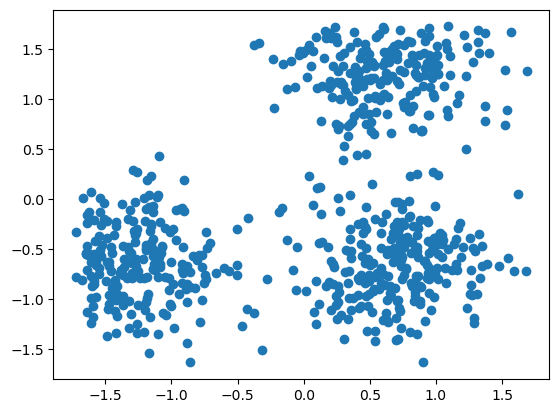

In [10]:
#Plot new Data

plt.scatter(df1["f1"], df1["f2"])

In [11]:
#4 DBscan to Find Outliers
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(df)

Text(0, 0.5, '$x_2$')

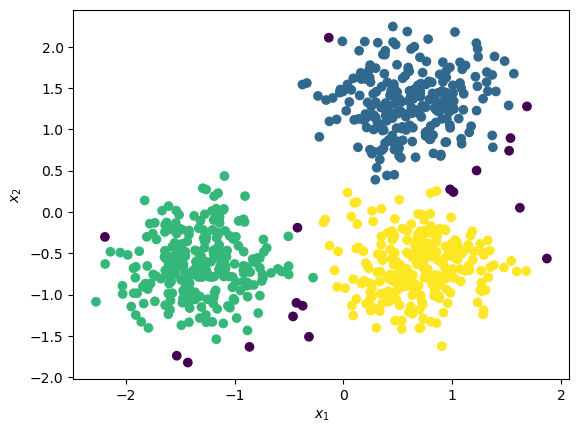

In [12]:
import math

plt.scatter(X,y, 
            c=db.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


Filtered out dbscan outliers: Int64Index([ 16,  76,  95, 108, 110, 135, 146, 149, 165, 273, 414, 443, 461,
            637, 656, 657, 663, 684],
           dtype='int64')


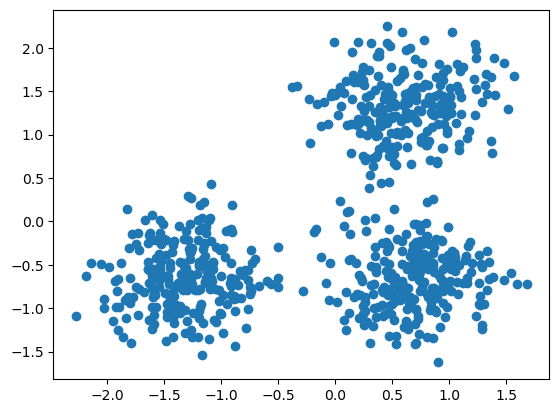

In [13]:
dbscan= DBSCAN(eps=0.3, min_samples=10).fit(df)

dbscan_df= df.copy()

dbscan_labels= dbscan.labels_ 
dbscan_df["labels"]= dbscan_labels

#Remove Db scan Outliers
dbscan_outliers= dbscan_df.loc[dbscan_df["labels"] == -1].index
print("Filtered out dbscan outliers:",dbscan_outliers)
dbscan_df.drop(dbscan_outliers, inplace= True)

#New Dbscan with filtered outliers
plt.scatter(dbscan_df["f1"], dbscan_df["f2"])

In [14]:
#5
#Run new k means for cleaned dataset and create labels column for prediction 
df2= df1.copy()

df2= df2.drop(columns=['f1_dist', 'f2_dist'])

cluster= KMeans(n_clusters= 3)
model= cluster.fit(df2)
labels= model.labels_

df2["labels"]= labels
df2

,f1,f2,labels
0,0.494261,1.451067,1
1,-1.428081,-0.837064,0
2,0.338559,1.038759,1
3,0.119001,-1.053976,2
5,-1.261570,0.271881,0
...,...,...,...
745,0.505927,1.213927,1
746,-1.640461,-0.469973,0
747,-0.057139,-0.909261,2
748,-1.169394,0.039597,0


In [15]:
#Get X and Y variables
X= df2.iloc[:, df2.columns != "labels"].values
y= df2.iloc[:, df2.columns == "labels"].values.ravel()

In [16]:
#5 Decision Tree

#Define Models 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

tree = DecisionTreeClassifier()
tree= tree.fit(X_train, y_train)
tree_model= tree.predict(X_test)
accuracy= accuracy_score(y_test, tree_model)

[Text(0.4, 0.875, 'f1 <= -0.399\nsamples = 479\nvalue = [155, 148, 176]'),
 Text(0.2, 0.625, 'samples = 154\nvalue = [154, 0, 0]'),
 Text(0.6, 0.625, 'f2 <= 0.332\nsamples = 325\nvalue = [1, 148, 176]'),
 Text(0.4, 0.375, 'f1 <= -0.231\nsamples = 177\nvalue = [1, 0, 176]'),
 Text(0.2, 0.125, 'samples = 1\nvalue = [1, 0, 0]'),
 Text(0.6, 0.125, 'samples = 176\nvalue = [0, 0, 176]'),
 Text(0.8, 0.375, 'samples = 148\nvalue = [0, 148, 0]')]

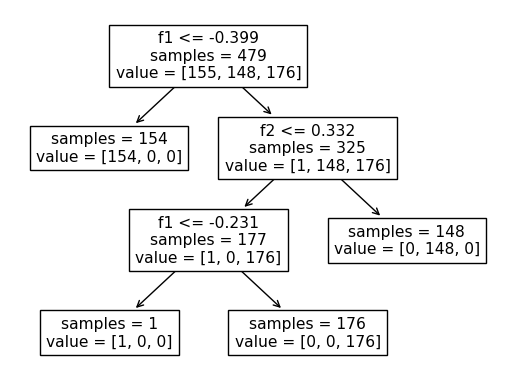

In [17]:
#Visualize Decision tyre
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(tree, feature_names=['f1', 'f2'], impurity=False)

In [18]:
#6
cluster= KMeans(n_clusters= 3)
model= cluster.fit(df)
labels= model.labels_

df["labels"]= labels
df

X= df.iloc[:, df.columns != "labels"].values
y= df.iloc[:, df.columns == "labels"].values.ravel()

df

,f1,f2,labels
0,0.494261,1.451067,2
1,-1.428081,-0.837064,1
2,0.338559,1.038759,2
3,0.119001,-1.053976,0
4,1.122425,1.774937,2
...,...,...,...
745,0.505927,1.213927,2
746,-1.640461,-0.469973,1
747,-0.057139,-0.909261,0
748,-1.169394,0.039597,1


In [19]:
#6 Here we get a lower decision tree accuracry when we remove the outliers
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

tree2 = DecisionTreeClassifier()
tree2= tree2.fit(X_train, y_train)
tree_model2= tree2.predict(X_test)
accuracy2= accuracy_score(y_test, tree_model2)
accuracy2

0.9955555555555555